Imported Data:
     GBFRD  GBFRD-RBF   FREAD
0   0.8245     0.8205  0.8252
1   0.9945     0.9947  0.9726
2   0.9958     0.9929  0.9808
3   0.8276     0.8035  0.7816
4   0.9016     0.9027  0.8655
5   0.9965     0.9965  0.9930
6   0.8824     0.8924 -1.0000
7   0.5000     0.5442 -1.0000
8   0.9038     0.8815  0.8827
9   0.9848     0.9876  0.9759
10  0.9978     0.9976  0.9989
11  1.0000     1.0000  0.9977

Friedman test p-value: 0.0401
Significant differences detected. Proceeding with Nemenyi test.

Average Ranks:
GBFRD        1.666667
GBFRD-RBF    1.750000
FREAD        2.583333
dtype: float64

Nemenyi p-values matrix:
              GBFRD  GBFRD-RBF     FREAD
GBFRD      1.000000   0.977292  0.063806
GBFRD-RBF  0.977292   1.000000  0.102484
FREAD      0.063806   0.102484  1.000000

Number of datasets (N): 12
Number of algorithms (k): 3

Critical Difference (CD): 0.957


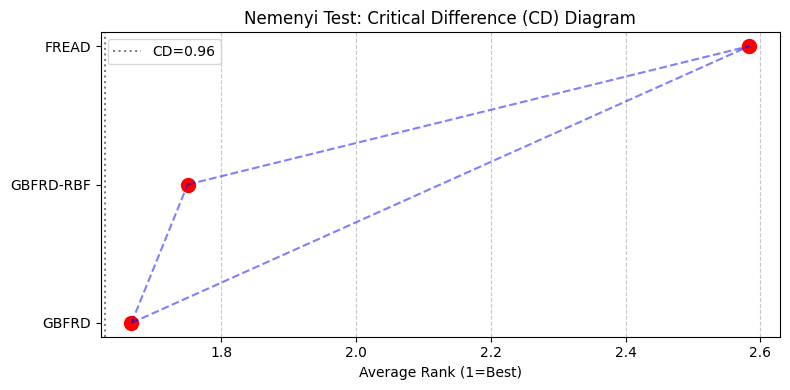

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# 1. Import data from Excel
file_path = "./dataROC.xlsx"  # Change to your file path
data = pd.read_excel(file_path, header=0)  

# 2. Check data structure
print("Imported Data:")
print(data.head(12))

# 3. Perform Friedman test (check if differences exist)
friedman_stat, p_value = friedmanchisquare(*data.T.values)  # Transpose to get algorithms in columns
print(f"\nFriedman test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant differences detected. Proceeding with Nemenyi test.")
else:
    print("No significant differences (Friedman test).")

# 4. Compute average ranks
ranks = data.rank(axis=1, ascending=False)  # Rank within each row (1=best)
avg_ranks = ranks.mean(axis=0)
print("\nAverage Ranks:")
print(avg_ranks)

# 5. Nemenyi post-hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(data)
print("\nNemenyi p-values matrix:")
print(nemenyi_results)

# 6. Critical Difference (CD) for visualization
N = len(data)  # Number of datasets
print(f"\nNumber of datasets (N): {N}")
k = len(data.columns)  # Number of algorithms
print(f"Number of algorithms (k): {k}")
q_alpha = 2.343  # For alpha=0.05 (from Nemenyi table)
CD = q_alpha * np.sqrt((k * (k + 1)) / (6 * N))
print(f"\nCritical Difference (CD): {CD:.3f}")

# 7. Plot Critical Difference (CD) Diagram
plt.figure(figsize=(8, 4))
plt.scatter(avg_ranks.values, range(k), color='red', s=100)
plt.yticks(range(k), avg_ranks.index)
plt.xlabel("Average Rank (1=Best)")
plt.title("Nemenyi Test: Critical Difference (CD) Diagram")

# Draw lines between algorithms not significantly different
for i in range(k):
    for j in range(i + 1, k):
        if nemenyi_results.iloc[i, j] > 0.05:  # If p > 0.05, not significant
            plt.plot([avg_ranks.values[i], avg_ranks.values[j]], [i, j], 'b--', alpha=0.5)

plt.axvline(x=max(avg_ranks.values) - CD, linestyle=':', color='gray', label=f'CD={CD:.2f}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Imported Data:
     GBFRD  GBFRD-RBF   FREAD
0   0.5047     0.5011  0.4905
1   0.9623     0.9630  0.8349
2   0.9645     0.9310  0.8494
3   0.0628     0.0461  0.0460
4   0.7349     0.7417  0.6851
5   0.9410     0.9410  0.8177
6   0.4904     0.4905  0.0000
7   0.5127     0.0385  0.0000
8   0.1928     0.1709  0.1434
9   0.6892     0.7226  0.7223
10  0.9672     0.9619  0.9881
11  1.0000     1.0000  0.4335

Friedman test p-value: 0.0050
Significant differences detected. Proceeding with Nemenyi test.

Average Ranks:
GBFRD        1.583333
GBFRD-RBF    1.666667
FREAD        2.750000
dtype: float64

Nemenyi p-values matrix:
              GBFRD  GBFRD-RBF     FREAD
GBFRD      1.000000   0.977292  0.011879
GBFRD-RBF  0.977292   1.000000  0.021715
FREAD      0.011879   0.021715  1.000000

Critical Difference (CD): 0.957


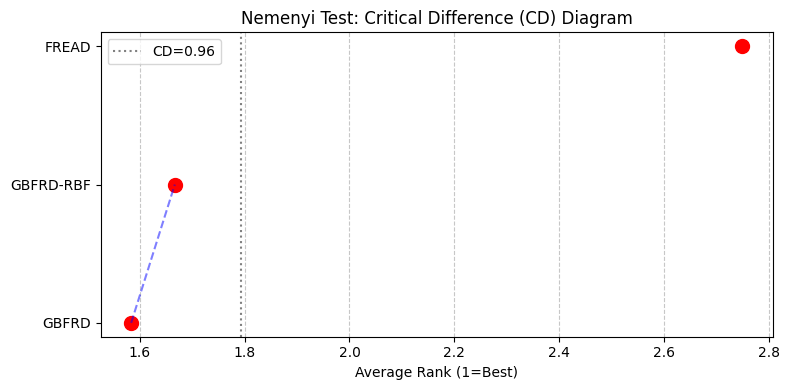

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# 1. Import data from Excel
file_path = "./dataPR.xlsx"  # Change to your file path
data = pd.read_excel(file_path, header=0)  


# 2. Check data structure
print("Imported Data:")
print(data.head(12))

# 3. Perform Friedman test (check if differences exist)
friedman_stat, p_value = friedmanchisquare(*data.T.values)  # Transpose to get algorithms in columns
print(f"\nFriedman test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant differences detected. Proceeding with Nemenyi test.")
else:
    print("No significant differences (Friedman test).")

# 4. Compute average ranks
ranks = data.rank(axis=1, ascending=False)  # Rank within each row (1=best)
avg_ranks = ranks.mean(axis=0)
print("\nAverage Ranks:")
print(avg_ranks)

# 5. Nemenyi post-hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(data)
print("\nNemenyi p-values matrix:")
print(nemenyi_results)

# 6. Critical Difference (CD) for visualization
N = len(data)  # Number of datasets
k = len(data.columns)  # Number of algorithms
q_alpha = 2.343  # For alpha=0.05 (from Nemenyi table)
CD = q_alpha * np.sqrt((k * (k + 1)) / (6 * N))
print(f"\nCritical Difference (CD): {CD:.3f}")

# 7. Plot Critical Difference (CD) Diagram
plt.figure(figsize=(8, 4))
plt.scatter(avg_ranks.values, range(k), color='red', s=100)
plt.yticks(range(k), avg_ranks.index)
plt.xlabel("Average Rank (1=Best)")
plt.title("Nemenyi Test: Critical Difference (CD) Diagram")

# Draw lines between algorithms not significantly different
for i in range(k):
    for j in range(i + 1, k):
        if nemenyi_results.iloc[i, j] > 0.05:  # If p > 0.05, not significant
            plt.plot([avg_ranks.values[i], avg_ranks.values[j]], [i, j], 'b--', alpha=0.5)

plt.axvline(x=max(avg_ranks.values) - CD, linestyle=':', color='gray', label=f'CD={CD:.2f}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Imported Data:
       GBFRD  GBFRD-RBF         FREAD
0    51.1415    54.1076    166.050200
1     1.5165     1.4525      7.318900
2     0.6423     0.7103      0.229600
3    90.0814    24.0474  14149.112796
4     4.5348     4.0764      1.707400
5     0.8960     0.8403      0.170000
6    96.2146    20.1032  99999.000000
7   260.1729    30.3302  99999.000000
8    14.1282     6.5100    807.310000
9     1.1808     1.1025      5.770600
10    3.9125     3.9436     10.309800
11    2.8876     1.8146     68.268600

Friedman test p-value: 0.0498
Significant differences detected. Proceeding with Nemenyi test.

Average Ranks:
GBFRD        2.0
GBFRD-RBF    1.5
FREAD        2.5
dtype: float64

Nemenyi p-values matrix:
              GBFRD  GBFRD-RBF     FREAD
GBFRD      1.000000   0.438489  0.438489
GBFRD-RBF  0.438489   1.000000  0.038035
FREAD      0.438489   0.038035  1.000000

Critical Difference (CD): 0.957


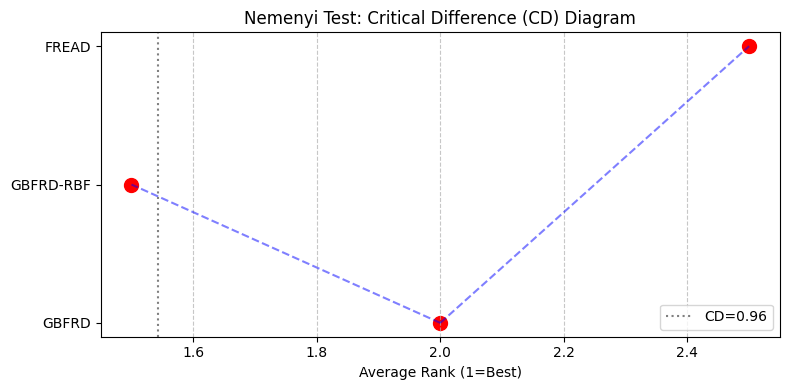

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# 1. Import data from Excel
file_path = "./dataET.xlsx"  # Change to your file path
data = pd.read_excel(file_path, header=0)  

# 2. Check data structure
print("Imported Data:")
print(data.head(12))

# 3. Perform Friedman test (check if differences exist)
friedman_stat, p_value = friedmanchisquare(*data.T.values)  # Transpose to get algorithms in columns
print(f"\nFriedman test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant differences detected. Proceeding with Nemenyi test.")
else:
    print("No significant differences (Friedman test).")

# 4. Compute average ranks
ranks = data.rank(axis=1, ascending=True)  # Rank within each row (1=best)
avg_ranks = ranks.mean(axis=0)
print("\nAverage Ranks:")
print(avg_ranks)

# 5. Nemenyi post-hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(data)
print("\nNemenyi p-values matrix:")
print(nemenyi_results)

# 6. Critical Difference (CD) for visualization
N = len(data)  # Number of datasets
k = len(data.columns)  # Number of algorithms
q_alpha = 2.343  # For alpha=0.05 (from Nemenyi table)
CD = q_alpha * np.sqrt((k * (k + 1)) / (6 * N))
print(f"\nCritical Difference (CD): {CD:.3f}")

# 7. Plot Critical Difference (CD) Diagram
plt.figure(figsize=(8, 4))
plt.scatter(avg_ranks.values, range(k), color='red', s=100)
plt.yticks(range(k), avg_ranks.index)
plt.xlabel("Average Rank (1=Best)")
plt.title("Nemenyi Test: Critical Difference (CD) Diagram")

# Draw lines between algorithms not significantly different
for i in range(k):
    for j in range(i + 1, k):
        if nemenyi_results.iloc[i, j] > 0.05:  # If p > 0.05, not significant
            plt.plot([avg_ranks.values[i], avg_ranks.values[j]], [i, j], 'b--', alpha=0.5)

plt.axvline(x=max(avg_ranks.values) - CD, linestyle=':', color='gray', label=f'CD={CD:.2f}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()